# Chi-square goodness-of-fit test

**date**
: 2021-04-18

**data**
: `uniform_goals.csv`

**ref**
: NA

**desc**
: Performing a **chi-square goodness-of-fit** test.

In [1]:
from scripts.data import Data
from scipy.stats import chisquare, randint
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sample = Data.load_uniform_goals()

In [3]:
sample.head()

,banding,obs
0,1,82
1,2,116
2,3,108
3,4,98
4,5,95


Data has been provided showing the total number of goals scored per ten minute period in an English Premier League football season in normal time.
Period `1` refers to minutes 0-10; `2` refers to 10-20; etc.
It has been proposed that a discrete uniform distrution would be a good model for the data.
Carry out a **chi-square goodness-of-fit** test to confirm the proposal.

We need to find the **expected** number of goals per banding.
Declare a new **discrete uniform** distribution with $m=1,\>n=9$.

In [4]:
u: randint = randint(
    low=sample["banding"].min(),
    high=sample["banding"].max()+1
)

Sum the total number of goals in the observation period.

In [5]:
total: int = sample["obs"].sum()

Add the column `exp`, which will hold the expected number of goals per banding.
This will be: **Pr**(goal) $\times$ **total**.

In [6]:
sample["exp"] = total * u.pmf(k=sample["banding"])

Check the `sample` DataFrame.

In [7]:
sample.head()

,banding,obs,exp
0,1,82,108.666667
1,2,116,108.666667
2,3,108,108.666667
3,4,98,108.666667
4,5,95,108.666667


There are $k=9$ categories of data and no parameter have been estimated, so there are 8 **df**.

Perform the **chi-square goodness-of-fit** test using `scipy.stats.chisquare`.

In [8]:
# ddof=delta degrees of freedom
# number of estimatd parameters goes here
chisquare(
    f_obs=sample["obs"],
    f_exp=sample["exp"],
    ddof=0
)

Power_divergenceResult(statistic=16.711656441717793, pvalue=0.03325561657000693)

Give that $p \in (0.01, 0.05]$, there is moderate evidence against the null hypothesis that the distribution of goals across the 90 minutes of a football match are uniformally distributed.

Out of interest, let us plot a side-by-side bar chart showing the **observed** and **expected** number of goals.

In [18]:
# data is wide format
# melt into long form
plt_melt = sample.melt(
    id_vars="banding",
    value_vars=["obs", "exp"],
    var_name="type",
    value_name="goals"
)

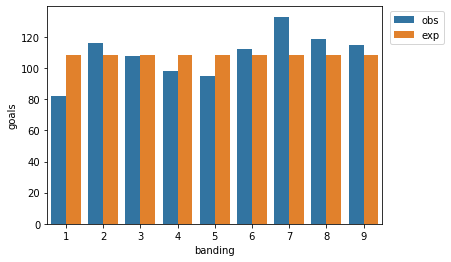

In [23]:
f, ax = plt.subplots()
ax = sns.barplot(
    data=plt_melt,
    x="banding",
    y="goals",
    hue="type"
)
plt.legend(bbox_to_anchor=(1.20, 1))    # move legend outside axis
plt.show()

In [9]:
help(chisquare)

Help on function chisquare in module scipy.stats.stats:

chisquare(f_obs, f_exp=None, ddof=0, axis=0)
    Calculate a one-way chi-square test.
    
    The chi-square test tests the null hypothesis that the categorical data
    has the given frequencies.
    
    Parameters
    ----------
    f_obs : array_like
        Observed frequencies in each category.
    f_exp : array_like, optional
        Expected frequencies in each category.  By default the categories are
        assumed to be equally likely.
    ddof : int, optional
        "Delta degrees of freedom": adjustment to the degrees of freedom
        for the p-value.  The p-value is computed using a chi-squared
        distribution with ``k - 1 - ddof`` degrees of freedom, where `k`
        is the number of observed frequencies.  The default value of `ddof`
        is 0.
    axis : int or None, optional
        The axis of the broadcast result of `f_obs` and `f_exp` along which to
        apply the test.  If axis is None, all va